# Site do kaggle: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Importações das Bibliotecas

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

### Carregando arquivo

In [104]:
arquivo = 'marketing_campaign 2.csv'  
data = pd.read_csv(arquivo, sep='\t')

display(data)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Analisando se os valores estão corretos ou se tem nulos 

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [74]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Perfil Demográfico dos Clientes

In [75]:
data['Idade'] = datetime.now().year - data['Year_Birth']
display(data)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Idade
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,57
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,78
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,43
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,68


In [76]:
fig_idade = px.histogram(data, x='Idade', nbins=30, color_discrete_sequence=['skyblue'], 
                         title='Distribuição de Idade dos Clientes', opacity=0.7, histnorm='density')
fig_idade.update_traces(marker_line_color='darkblue', marker_line_width=1.5)
fig_idade.update_layout(xaxis_title='Idade', yaxis_title='Frequência')
fig_idade.show()

fig_renda = px.histogram(data, x='Income', nbins=20, color_discrete_sequence=['green'], 
                         title='Distribuição de Renda dos Clientes', opacity=0.7, histnorm='density')
fig_renda.update_traces(marker_line_color='darkgreen', marker_line_width=1.5)
fig_renda.update_layout(xaxis_title='Renda Anual', yaxis_title='Densidade')
fig_renda.show()


In [106]:
data['Gasto_Total'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                            'MntFishProducts', 'MntSweetProducts', 
                            'MntGoldProds']].sum(axis=1)

fig = px.box(
    data, 
    x='Education', 
    y='Gasto_Total', 
    color='Education',  
    title='Distribuição de Gastos por Escolaridade',
    color_discrete_sequence=px.colors.qualitative.Set2  

fig.update_layout(
    xaxis_title='Escolaridade',
    yaxis_title='Gasto Total',
    template='plotly_white'
)

fig.show()


In [107]:
data['Gasto_Total'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 
                            'MntFishProducts', 'MntSweetProducts', 
                            'MntGoldProds']].sum(axis=1)


fig = px.scatter(data, x='Education', y='Gasto_Total', color='Marital_Status', 
                 title="Relação entre Escolaridade e Gasto Total", 
                 labels={'Educação': 'Nível de Escolaridade', 'Gasto_Total': 'Gasto Total'})
fig.show()

In [ ]:
fig = px.scatter(
    data, 
    x='Kidhome', 
    y='Gasto_Total', 
    color='Marital_Status', 
    color_discrete_sequence=px.colors.diverging.Tealrose, 
    title='Relação entre Número de Dependentes e Gasto Total', 
    labels={'Kidhome': 'Número de Crianças em Casa', 'Gasto_Total': 'Gasto Total'}
)

fig.update_layout(
    xaxis_title='Número de Crianças em Casa',
    yaxis_title='Gasto Total',
    legend_title='Estado Civil',
    template='plotly_white'
)

fig.show()

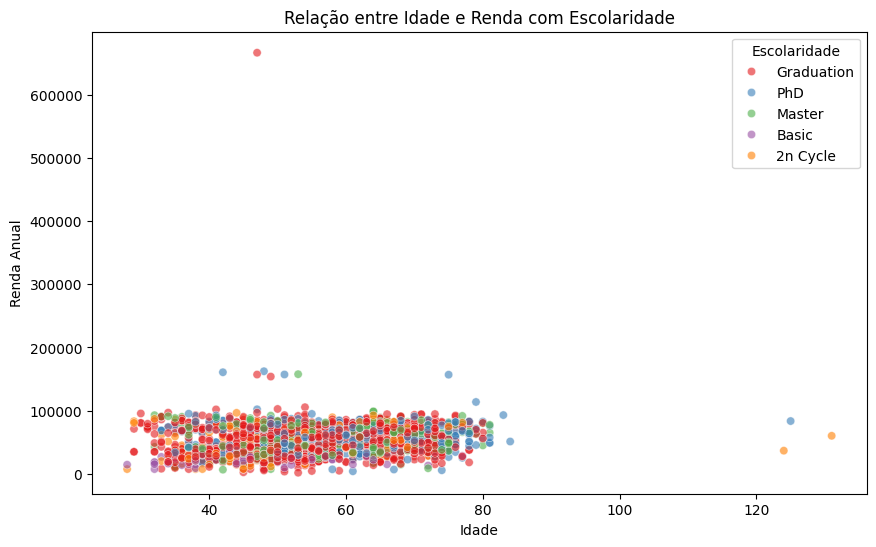

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Idade', y='Income', hue='Education', palette='Set1', alpha=0.6)
plt.title('Relação entre Idade e Renda com Escolaridade')
plt.xlabel('Idade')
plt.ylabel('Renda Anual')
plt.legend(title='Escolaridade')
plt.show()

# Comportamento de Consumo

## Compararando Gastos por Tipo de Produto

In [108]:
produtos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_long = data[produtos].melt(var_name='Produto', value_name='Gasto')

data_long['Produto'] = data_long['Produto'].replace({
    'MntWines': 'Vinho',
    'MntFruits': 'Frutas',
    'MntMeatProducts': 'Carne',
    'MntFishProducts': 'Peixe',
    'MntSweetProducts': 'Doces',
    'MntGoldProds': 'Ouro'
})


fig = px.box(data_long, x='Produto', y='Gasto', color='Produto', 
             title='Comparação de Gastos por Tipo de Produto', 
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(xaxis_title='Tipo de Produto', yaxis_title='Gasto (em Unidades Monetárias)')
fig.show()


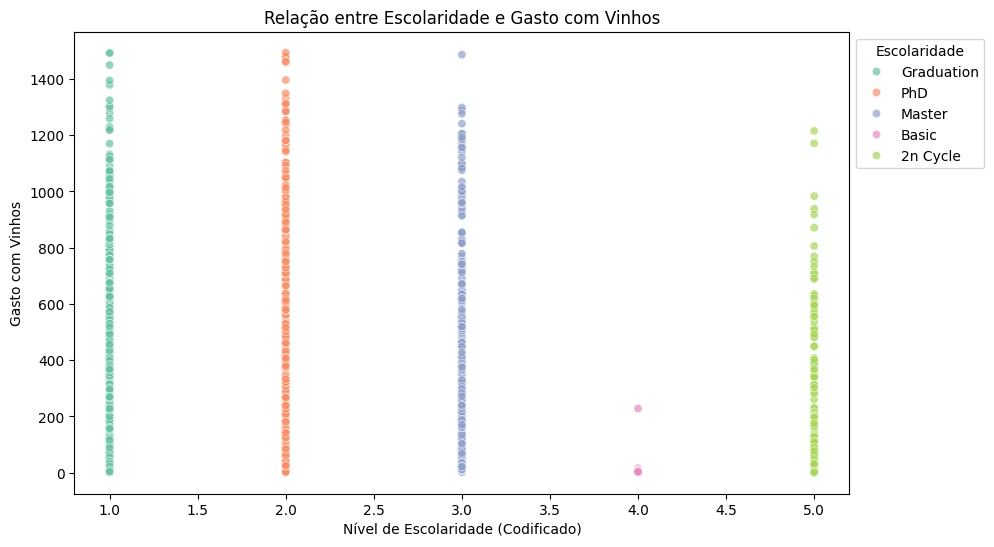

In [ ]:
escolaridade_map = {
    'Graduation': 1,
    'PhD': 2,
    'Master': 3,
    'Basic': 4,
    '2n Cycle': 5
}
data['Educação_Num'] = data['Education'].map(escolaridade_map)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Educação_Num', y='MntWines', hue='Education', palette='Set2', alpha=0.7)
plt.title('Relação entre Escolaridade e Gasto com Vinhos')
plt.xlabel('Nível de Escolaridade (Codificado)')
plt.ylabel('Gasto com Vinhos')
plt.legend(title='Escolaridade', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
fig = px.box(
    data, 
    x='Marital_Status', 
    y='MntWines', 
    color='Marital_Status',  
    title='Distribuição de Gastos com Vinho por Estado Civil',
    color_discrete_sequence=px.colors.qualitative.Set1  
)


fig.update_layout(
    xaxis_title='Estado Civil',
    yaxis_title='Gasto com Vinhos',
    template='plotly_white'
)


fig.show()

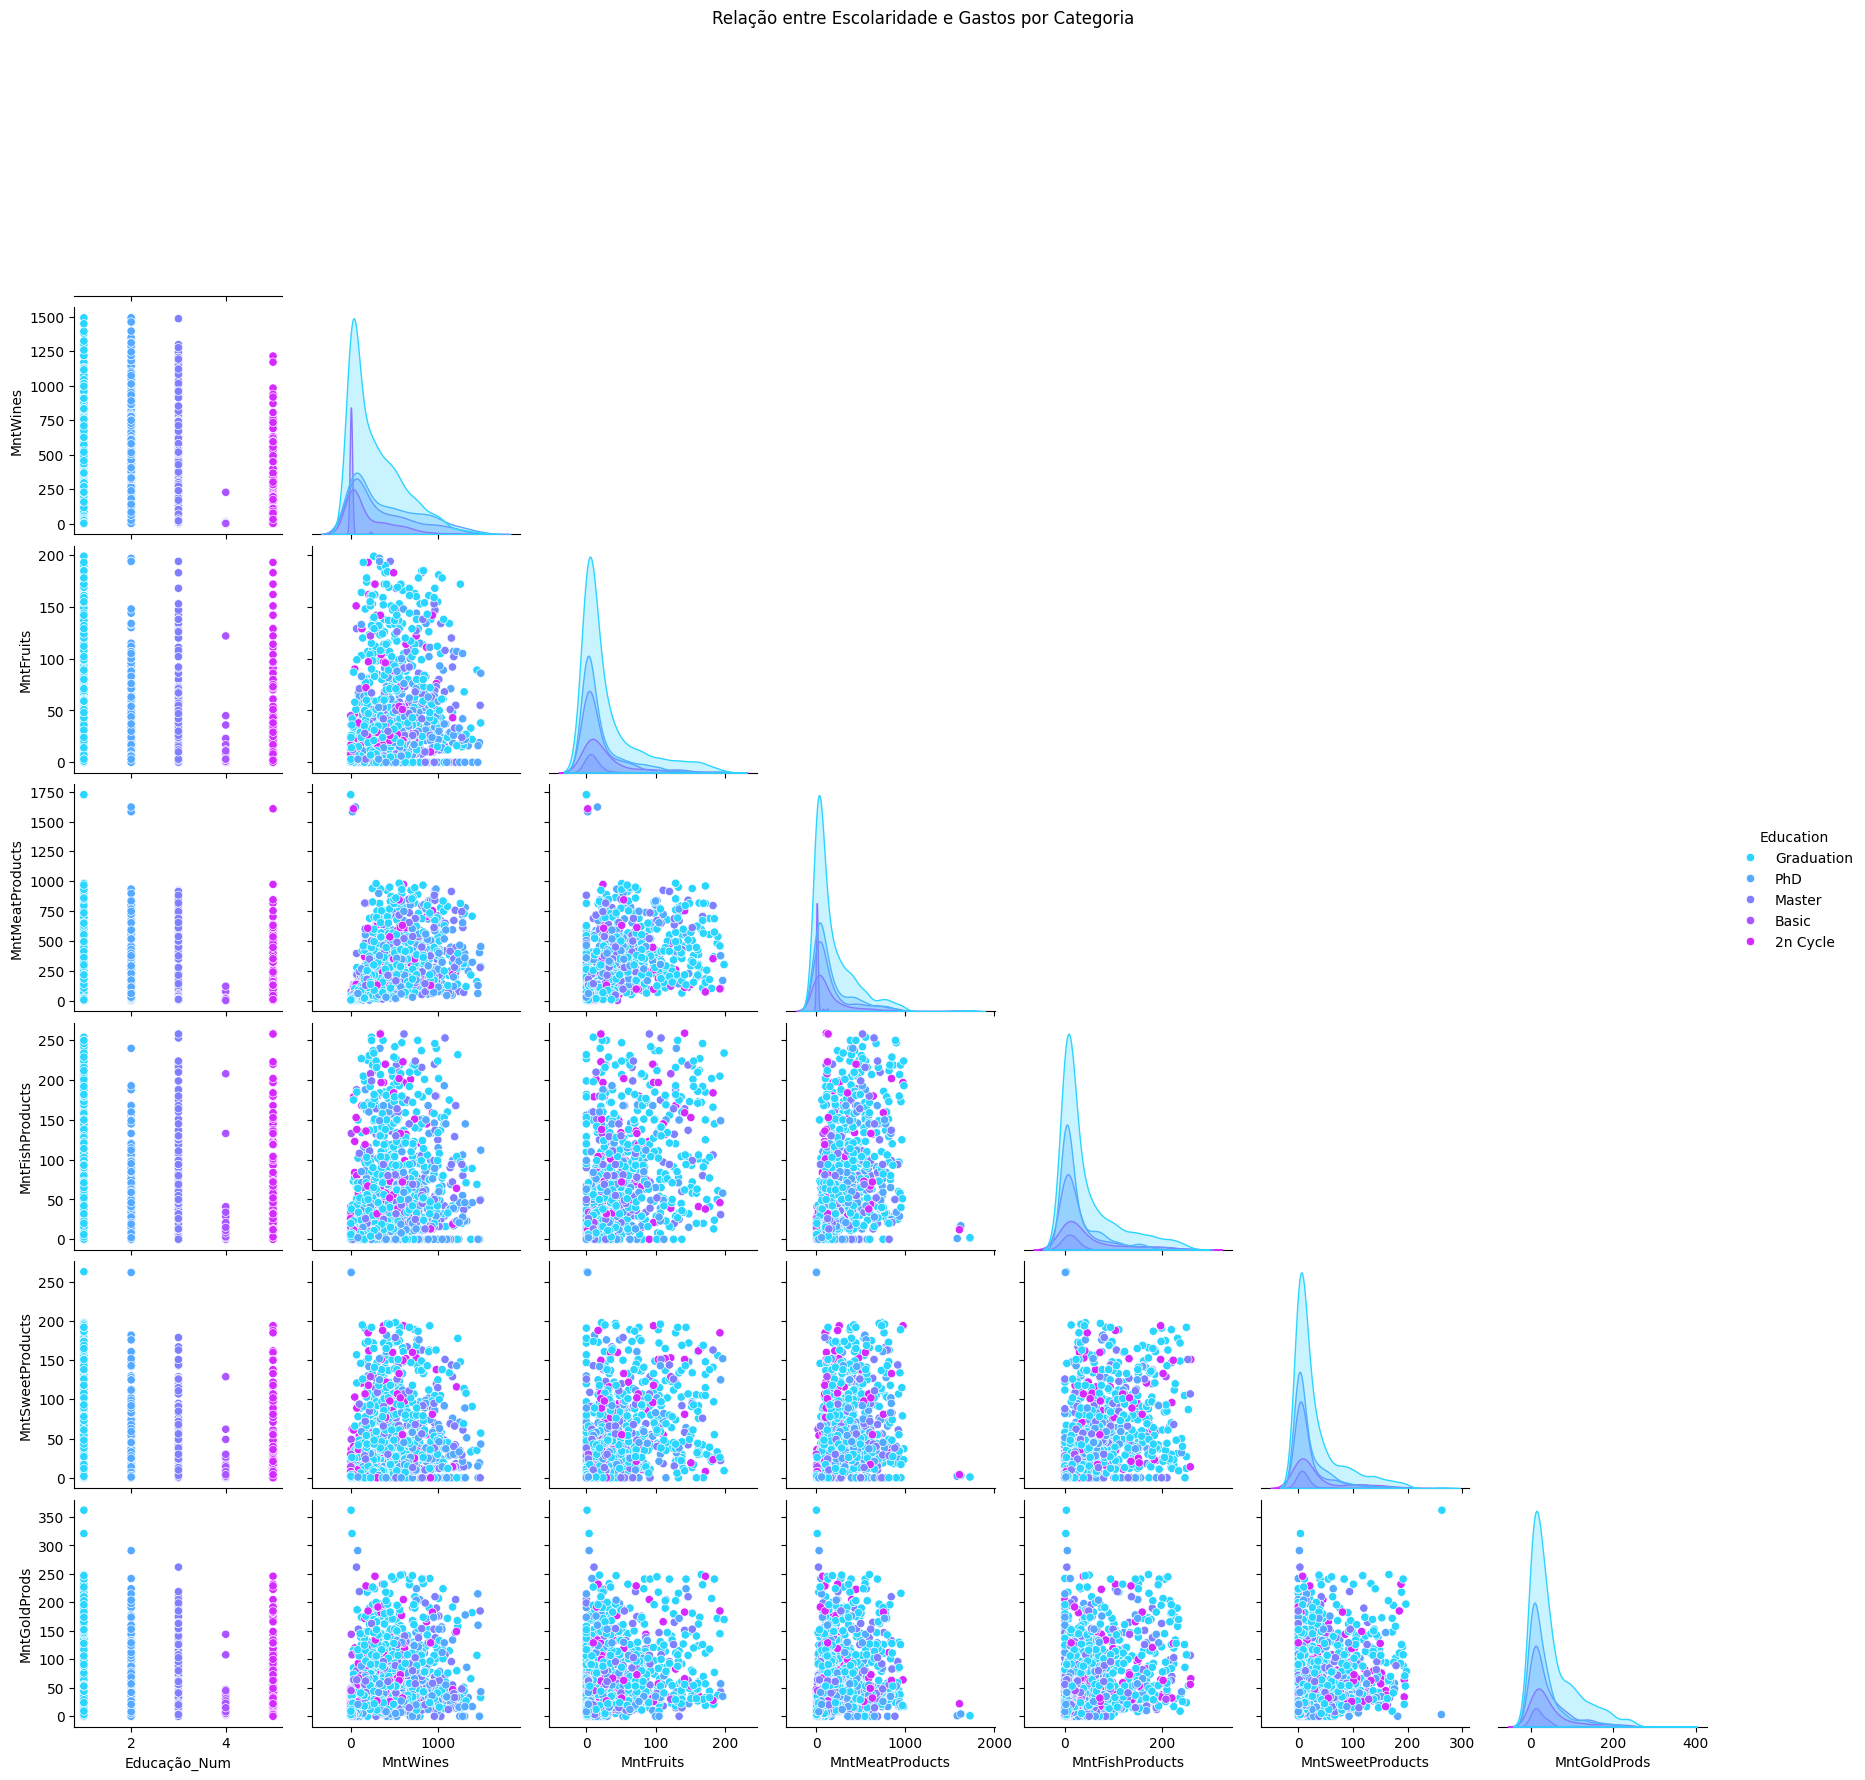

In [ ]:
categorias_gastos = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

data_pairplot = data[['Education', 'Educação_Num'] + categorias_gastos]

sns.pairplot(data=data_pairplot, hue='Education', palette='cool', diag_kind='kde', corner=True)
plt.suptitle('Relação entre Escolaridade e Gastos por Categoria', y=1.02)
plt.show()



# Desempenho de Campanhas de Marketing

## Taxa de Aceitação

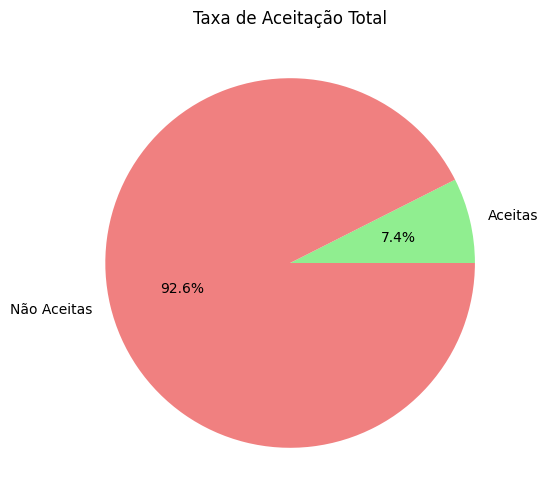

In [95]:
taxas_aceitacao = {
    'Campanha 1': data['AcceptedCmp1'].sum() * 100 / len(data),
    'Campanha 2': data['AcceptedCmp2'].sum() * 100 / len(data),
    'Campanha 3': data['AcceptedCmp3'].sum() * 100 / len(data),
    'Campanha 4': data['AcceptedCmp4'].sum() * 100 / len(data),
    'Campanha 5': data['AcceptedCmp5'].sum() * 100 / len(data),
    'Ultima Campanha': data['Response'].sum() * 100 / len(data)
}

taxa_total = sum(taxas_aceitacao.values()) / len(taxas_aceitacao)

plt.figure(figsize=(6,6))
plt.pie([taxa_total, 100 - taxa_total], labels=['Aceitas', 'Não Aceitas'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Taxa de Aceitação Total")
plt.show()


In [96]:
fig = px.bar(df_taxas, x='Campanha', y='Taxa_Aceitacao', 
             title="Taxa de Aceitação por Campanha e Total",
             labels={'Taxa_Aceitacao': 'Taxa de Aceitação (%)'},
             color='Campanha', 
             color_discrete_sequence=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#ff6666'])

fig.show()

## Perfil de Maior Aceitação

In [101]:
taxas_aceitacao = {
    'Campanha 1': data['AcceptedCmp1'].sum() * 100 / len(data),
    'Campanha 2': data['AcceptedCmp2'].sum() * 100 / len(data),
    'Campanha 3': data['AcceptedCmp3'].sum() * 100 / len(data),
    'Campanha 4': data['AcceptedCmp4'].sum() * 100 / len(data),
    'Campanha 5': data['AcceptedCmp5'].sum() * 100 / len(data),
    'Última Campanha': data['Response'].sum() * 100 / len(data)
}

taxa_total = sum(taxas_aceitacao.values()) / len(taxas_aceitacao)

perfil_aceitacao = data.groupby(['Marital_Status', 'Education'])[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
].sum().reset_index()

perfil_aceitacao['TotalAceites'] = perfil_aceitacao[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
].sum(axis=1)

perfil_aceitacao = perfil_aceitacao.sort_values(by='TotalAceites', ascending=False)

fig = px.bar(
    perfil_aceitacao, 
    x='Marital_Status', 
    y='TotalAceites', 
    color='Education', 
    title="Perfil de Maior Aceitação de Campanhas",
    labels={"TotalAceites": "Total de Aceites", "Marital_Status": "Estado Civil"},
    barmode="group"
)

fig.show()


# Segmentação de Clientes (Clusterização)

### Seleção de Variáveis Relevantes

In [ ]:
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

data_clustering = data[features]


### Normalização dos Dados

In [ ]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clustering)


# Encontrar o Número Ideal de Clusters (Método Elbow)

In [ ]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

elbow_data = pd.DataFrame({'Número de Clusters': range(1, 11), 'WCSS': wcss})

fig = px.line(elbow_data, x='Número de Clusters', y='WCSS', 
              title='Método Elbow para Determinação de Clusters', 
              markers=True)

fig.update_traces(line=dict(dash='dash', width=3), marker=dict(size=8, symbol='circle'))
fig.update_layout(xaxis_title='Número de Clusters', yaxis_title='WCSS')
fig.show()

## Aplicação do K-Means


In [ ]:
k = 4  
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

data['Cluster'] = clusters


## Análise dos Clusters

In [ ]:
cluster_analysis = data.groupby('Cluster')[features].mean()
display(cluster_analysis)


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,,,,,,,
0,131.688385,7.519830,48.502833,10.905099,7.485127,24.791785,0.004958,0.001416,0.072238,0.000000,0.001416,0.090652
1,505.139665,66.508380,374.154562,94.169460,66.728119,83.586592,0.054004,0.000000,0.054004,0.005587,0.000000,0.135940
2,810.240260,65.831169,526.532468,93.480519,74.714286,85.766234,0.564935,0.038961,0.207792,0.181818,0.831169,0.603896
3,721.423358,17.854015,171.350365,26.963504,19.802920,40.211679,0.153285,0.160584,0.000000,0.992701,0.240876,0.291971


In [ ]:
fig = px.scatter(data, 
                 x='MntWines', 
                 y='MntMeatProducts', 
                 color='Cluster', 
                 color_discrete_sequence=px.colors.qualitative.Set2, 
                 title='Distribuição dos Clusters com Base em Vinho e Carne',
                 labels={'MntWines': 'Gasto com Vinhos', 'MntMeatProducts': 'Gasto com Carne'})

fig.update_layout(
    xaxis_title='Gasto com Vinhos', 
    yaxis_title='Gasto com Carne',
    legend_title='Cluster'
)

fig.show()

# Criação de um Modelo de Classificação para Predizer Aceitação de Campanha

In [ ]:
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
            'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

X = data[features]
y = data['Response']  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.58      0.27      0.37        95

    accuracy                           0.87       672
   macro avg       0.73      0.62      0.65       672
weighted avg       0.85      0.87      0.85       672



/Users/vidigal/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       577
           1       0.56      0.31      0.39        95

    accuracy                           0.87       672
   macro avg       0.73      0.63      0.66       672
weighted avg       0.85      0.87      0.85       672



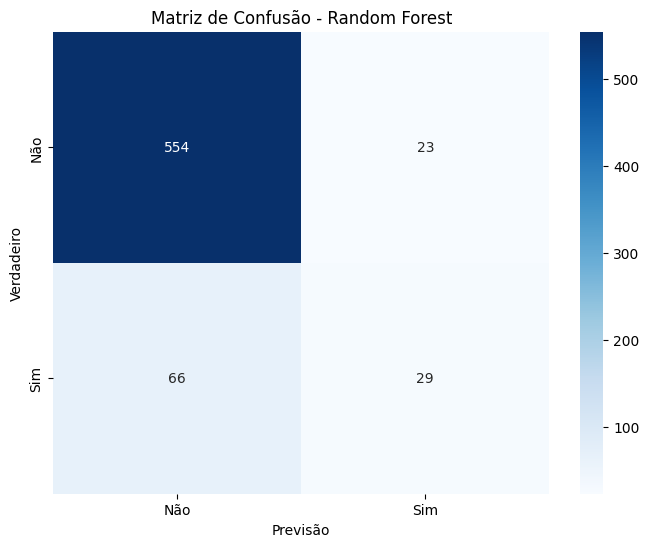

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.show()


/var/folders/8m/ggz5tqn57pj2_kyhqmpfm56h0000gn/T/ipykernel_61977/2481203022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


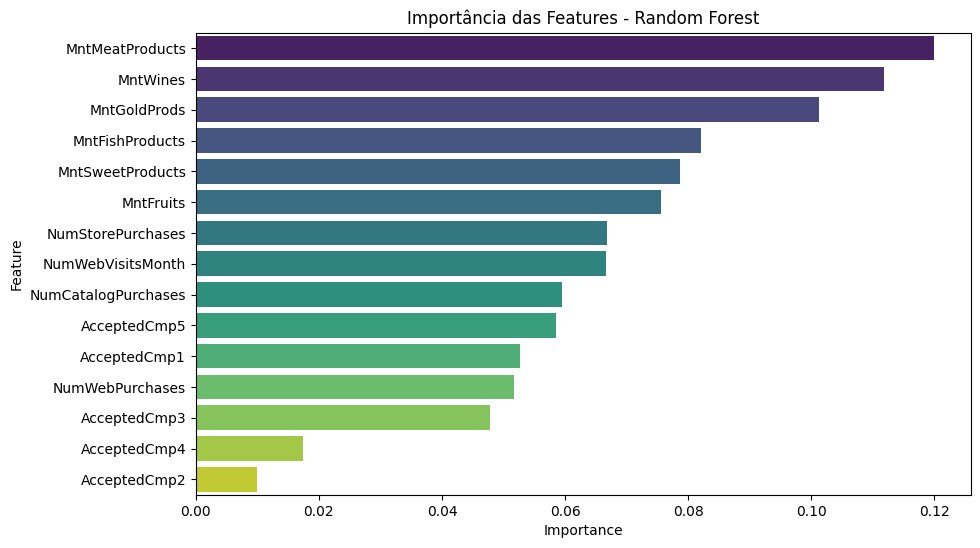

In [ ]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Importância das Features - Random Forest')
plt.show()


# Análises de Correlação

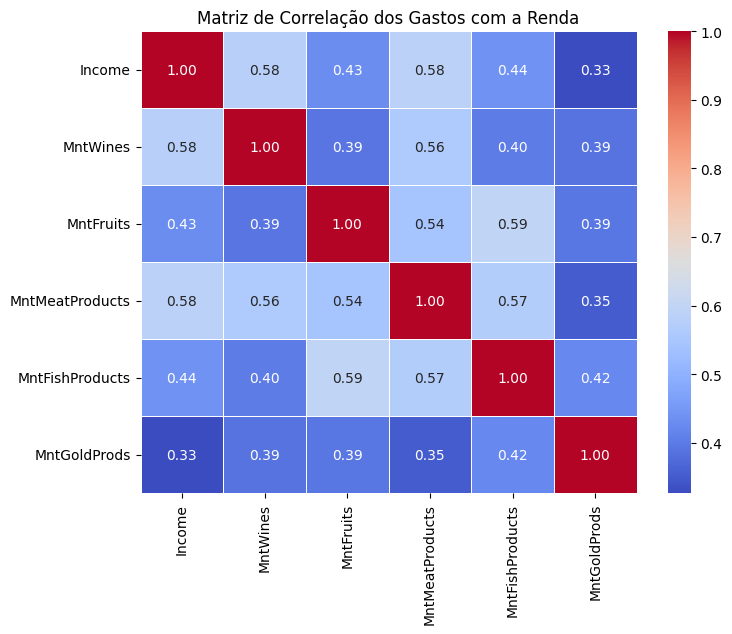

In [ ]:
correlation_matrix = data[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação dos Gastos com a Renda')
plt.show()


## Gráficos de Boxplot

## Gráficos de Tendência

In [ ]:
gasto_por_ano = data.groupby('Ano_Inscricao')['Gasto_Total'].mean().reset_index()

fig = px.line(gasto_por_ano, 
              x='Ano_Inscricao', y='Gasto_Total', 
              title='Tendência de Gasto ao Longo dos Anos', 
              markers=True, 
              line_shape='linear')  

fig.update_layout(
    xaxis_title='Ano de Inscrição',
    yaxis_title='Gasto Médio Total',
    template='plotly_white'
)

fig.show()

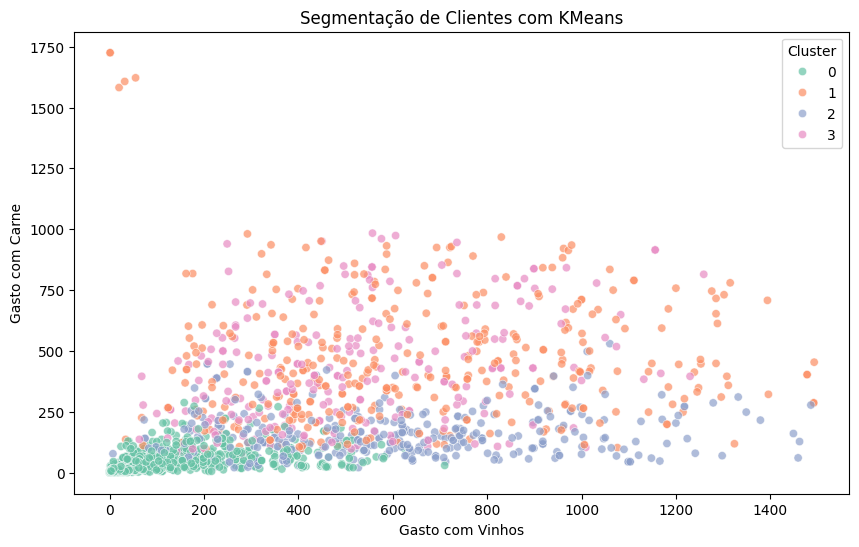

In [ ]:
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['MntWines'], y=data['MntMeatProducts'], hue=data['Cluster'], palette='Set2', alpha=0.7)
plt.title('Segmentação de Clientes com KMeans')
plt.xlabel('Gasto com Vinhos')
plt.ylabel('Gasto com Carne')
plt.show()